## Теоретическое описание метода неопределенных коэффициентов и его программная реализация

Пусть в одномерной области $[x_{min}, x_{max}]$ задана равномерная сетка из $N = m + l + 1$ узлов (Равномерная сетка - сетка, расстояние между двумя любыми соседними узлами которой равно постоянному h, где h - сеточный шаг). На этой области определена бесконечно непрерывно дифференцируемая ф-я $f$. Известны значения этой ф-и во всех узлах рассматриваемой сетки $\{f_i\}_{i=0}^N$ (говорять, что определена сеточная ф-я - проекция ф-и на сетку). Пусть нас интересует значение производной в некотором узле $j$, слева от которого $l$ узлов, справа $m$. Построим метод максимального порядка точности по значениям функции в сеточных узлах. Для этого представим производную в узле $j$ как сумму значений ф-и во всех узлах, взятых с некоторыми весами:
$$
f'(x_j) \approx \frac{1}{h}\sum_{k = -l}^m \alpha_k f(x_j+kh)
$$
Подберем веса так, чтобы по этим значениям порядок точности был максимальным. Оказывается, что по $N$ точкам можно построить метод $N-1$-го порядка точности.

#### Контрольный вопрос: что такое порядок точности метода?

Ваш ответ:

Порядок точности метода - наибольшая степень полинома, который даёт точное значение функции.

Для этого разложим в ряд Тейлора все члены, входящие в суммирование в выбранной аппроксимации (численном приближении), относительно точки $x_j$, сгруппируем члены при одинаковых степенях и приравняем к нулю коэффициенты при степенях ниже N (кроме первой, для нее приравняем к 1). В итоге получим N уравнений относительно N неизвестных.

#### Контрольный вопрос: почему в этом случае порядок метода будет $N-1$?

Ваш ответ:

($N+1$)-й элемент разложения в ряд Тёйлора - это 
$$
f^{(N)}(x_j)*const*h^N
$$
Раскладывая значения функций в точках до $N$-й степени производной, мы не можем гарантировать, что сгруппированная сумма N таких элементов (от N узлов), будет равна 0, если приравниваем к нулю коэфициенты при степенях ниже N (кроме первой, для нее приравняем к 1). Поэтому этот элемент $$f^{(N)}(x_j)*const*h^{N-1}$$ (степень h понизилась после деления на h по формуле) будет содержаться в виде $o(h^N)$. При разложении функций в узлах до степени $N-1$ мы получаем точное значение функции без поправки в виде $o(h^N)$. 

В матричном виде получившуюся систему можно представить как $A\alpha = b$, где $b^T$ = $(0,1,0,...,0)^T$, а матрица A
$$
A = \begin{pmatrix} 
1 & 1 & ... & 1 \\
-l & -l+1 & ... & m \\
(-l)^2 & (-l+1)^2 & ... & m^2 \\
(-l)^3 & (-l+1)^3 & ...  & m^3 \\
...&...&...&...\\
\end{pmatrix}
$$

#### Контрольный вопрос: как называется такая матрица? Существует ли единственное решение системы и почему?

Ваш ответ:

Матрица Вандермонда. Система всегда имеет единственное решение. Значения в строках нашей матрицы не повторяются, это является необходимым и достаточным условием того, что определитель матрицы Вандермонда не равен 0. Значит решение системы единственно.

In [1]:
#скрипт, который реализует описанный выше алгоритм
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    #print(A)
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

p = 4 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p+1)
u = np.sin(x) #ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.4999823898925212


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов
2. написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности

<Figure size 432x288 with 0 Axes>

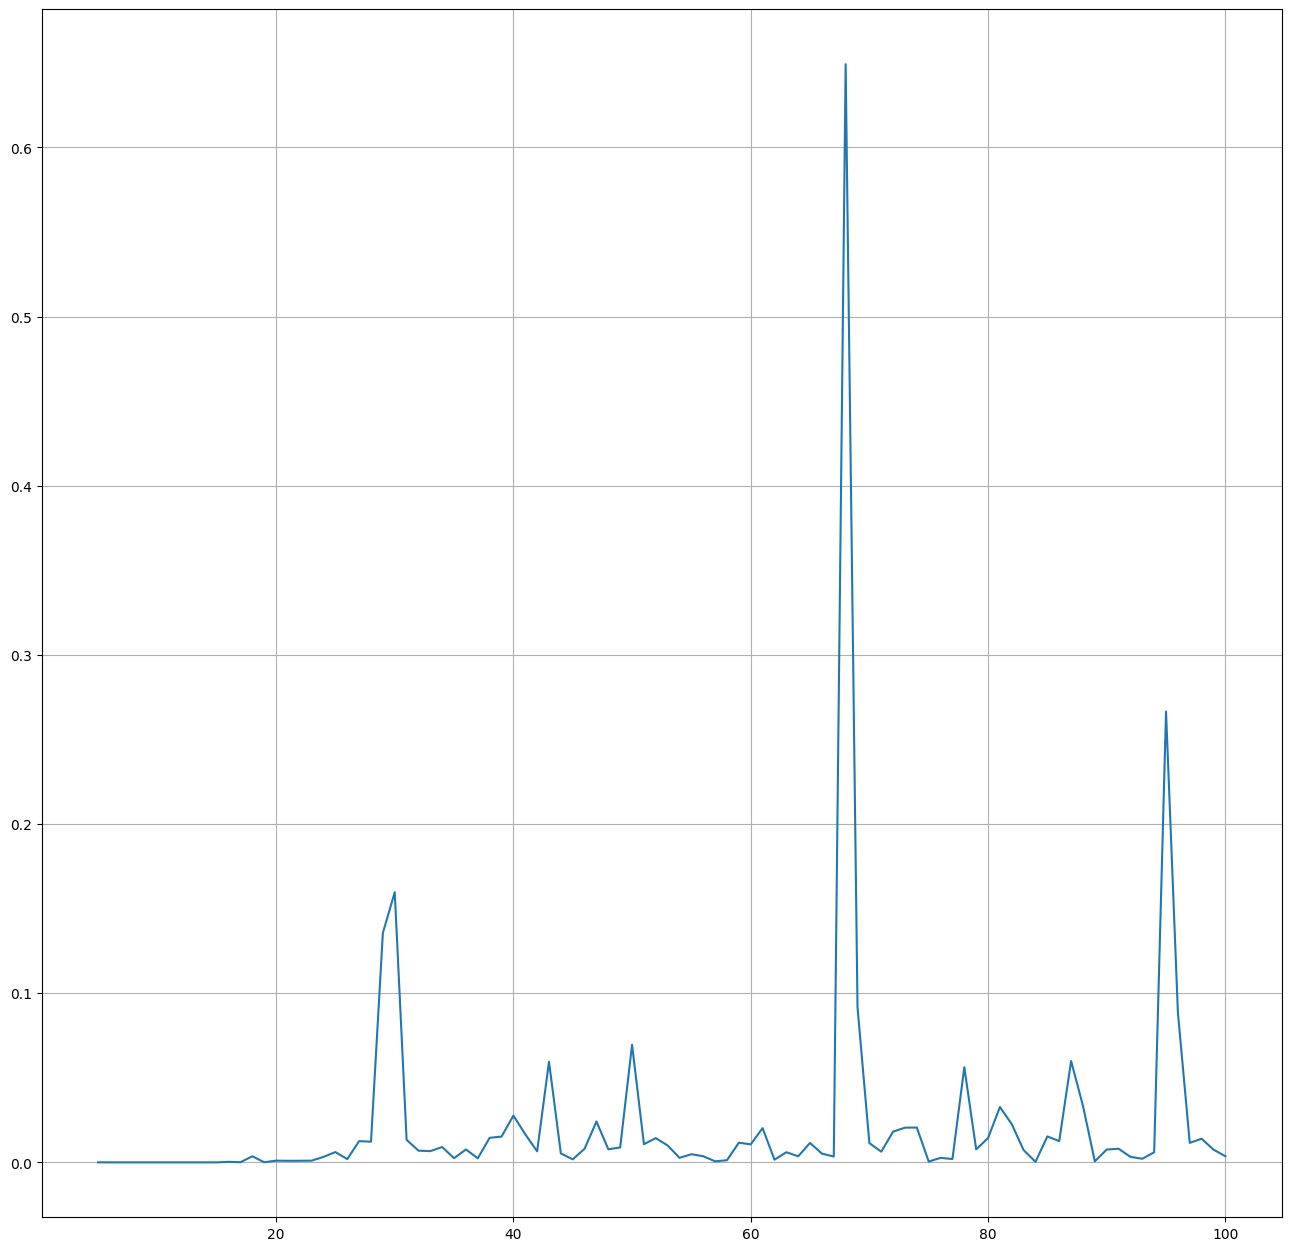

In [37]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

n_end1 = 101

x_graph = np.array ([j for j in range (5, n_end1)])

y_graph = np.array ([0.1 for j in range (5, n_end1)])

u_diff = np.cos (a)

for j in range (len (x_graph)):
    p = x_graph[j] - 1
    h = (b - a) / p
    x = np.linspace (a, b, p + 1)
    u = np.sin (x)
    
    diff = get_diff (u, 0, p, h)

    y_graph[j] = abs (diff - u_diff)

plt.figure ()

fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.plot (x_graph, y_graph)

plt.grid ()

plt.savefig(f"./graph1.png", dpi=100)

plt.show()

<Figure size 432x288 with 0 Axes>

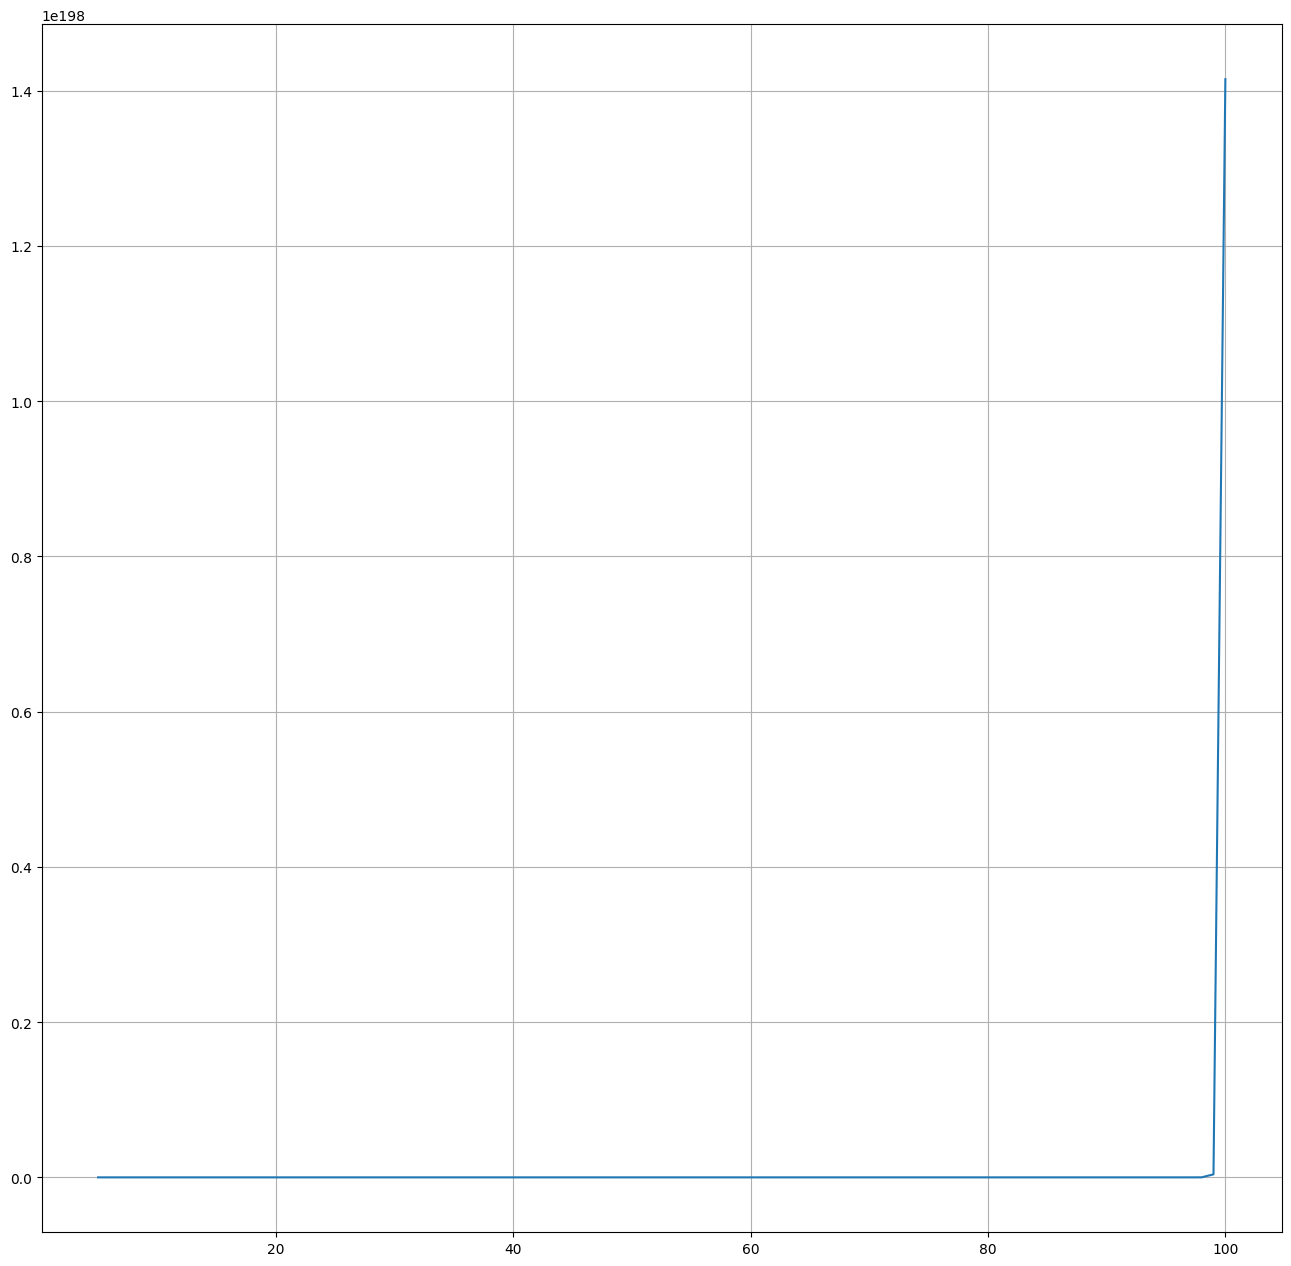

In [33]:
def get_a_num(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    #print(A)

    return la.norm (A, 1) * la.norm (la.inv (A), 1)

n_end2 = 101

x_graph = np.array ([j for j in range (5, n_end2)])

y_graph = np.array ([0.1 for j in range (5, n_end2)])

u_diff = np.cos (a)

for j in range (len (x_graph)):
    p = x_graph[j] - 1
    h = (b - a) / p
    x = np.linspace (a, b, p + 1)
    u = np.sin (x)
    
    y_graph[j] = get_a_num (u, 0, p, h)

plt.figure ()

fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.plot (x_graph, y_graph)

plt.grid ()

plt.savefig(f"./graph2.png", dpi=100)

plt.show()

## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков.

/home/jkoer/.local/lib/python3.8/site-packages/numpy/lib/twodim_base.py:626: RuntimeWarning: overflow encountered in accumulate
  multiply.accumulate(tmp[:, 1:], out=tmp[:, 1:], axis=1)


<Figure size 432x288 with 0 Axes>

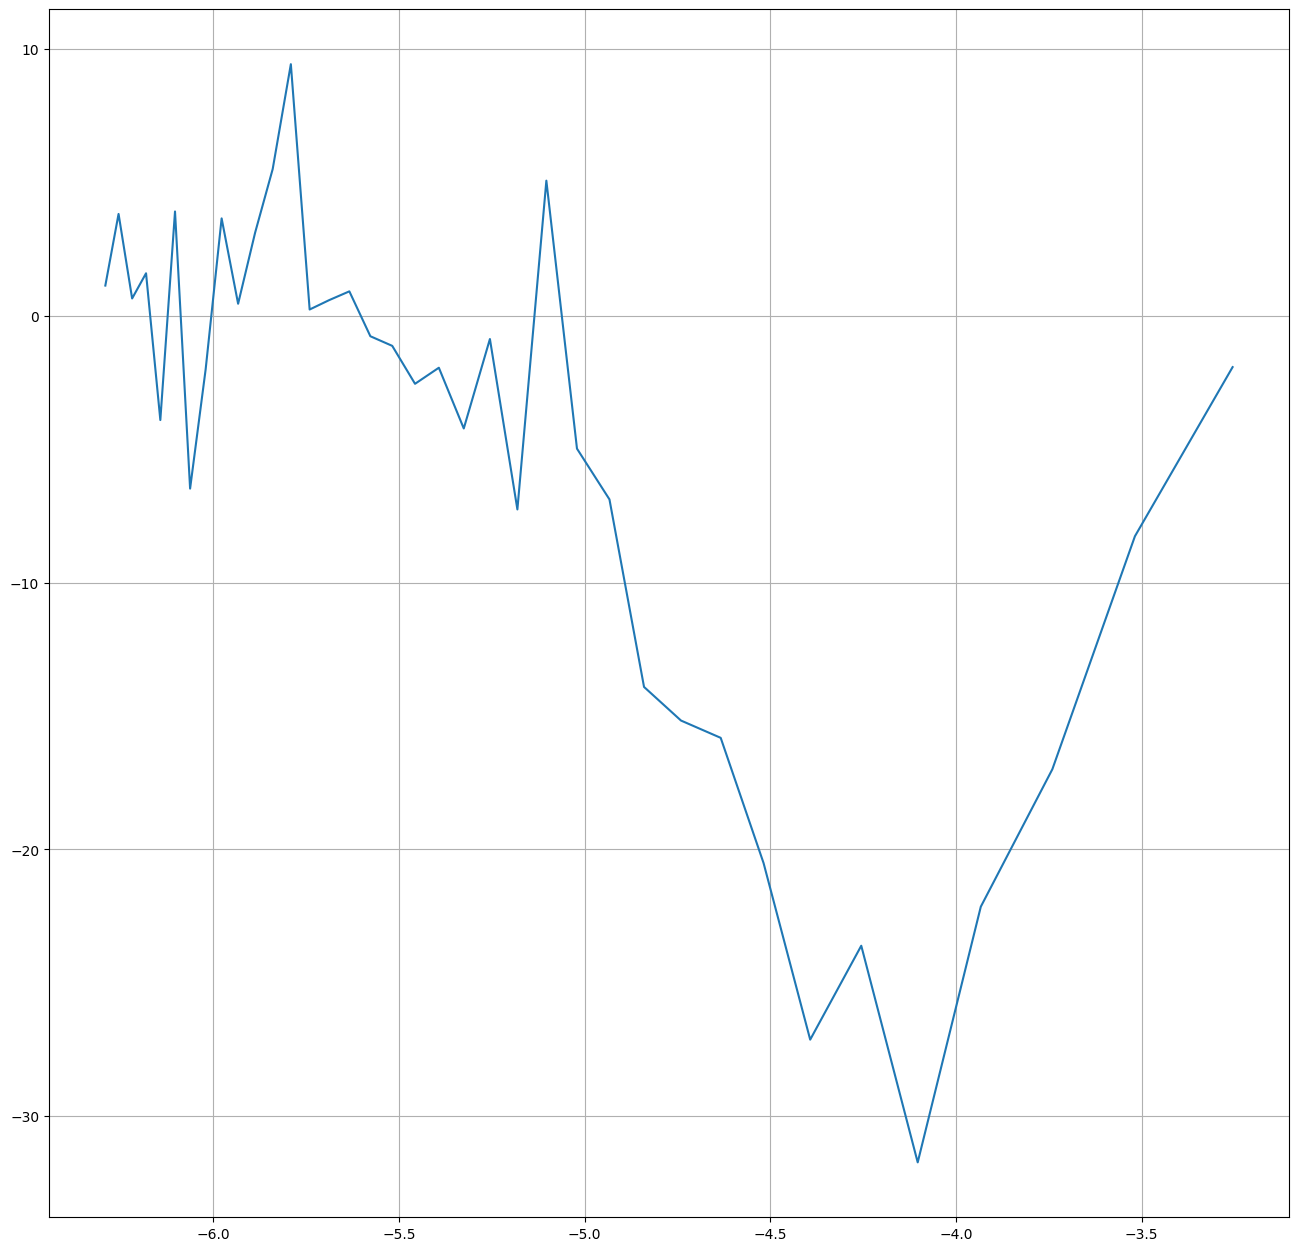

In [39]:
n_end1 = 101

x_graph = np.array ([j for j in range (5, n_end1)])

y_graph1 = np.array ([0.1 for j in range (5, n_end1)])

u_diff = np.cos (a)

for j in range (len (x_graph)):
    p = x_graph[j] - 1
    h = (b - a) / p
    x = np.linspace (a, b, p + 1)
    u = np.sin (x)
    
    diff = get_diff (u, 0, p, h)

    y_graph1[j] = abs (diff - u_diff)

    p = 2 * p
    h = (b - a) / p
    x = np.linspace (a, b, 2 * p + 1)
    u = np.sin (x)

    diff = get_diff (u, 0, p, h)

    y_graph1[j] = np.log2 (y_graph1[j] / (abs (diff - u_diff)))

plt.figure ()

fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.plot (np.log2 ((b - a) / (x_graph)), y_graph1)

plt.grid ()

plt.savefig(f"./graph3.png", dpi=100)

plt.show()

При больших $h$ равенство $C = C1$ некорректно, поэтому в правой части графика заметный рост. При маленьких $h$ появляется существенная ошибка округления в памяти компьютера, которую видим в правой части графика.

<Figure size 432x288 with 0 Axes>

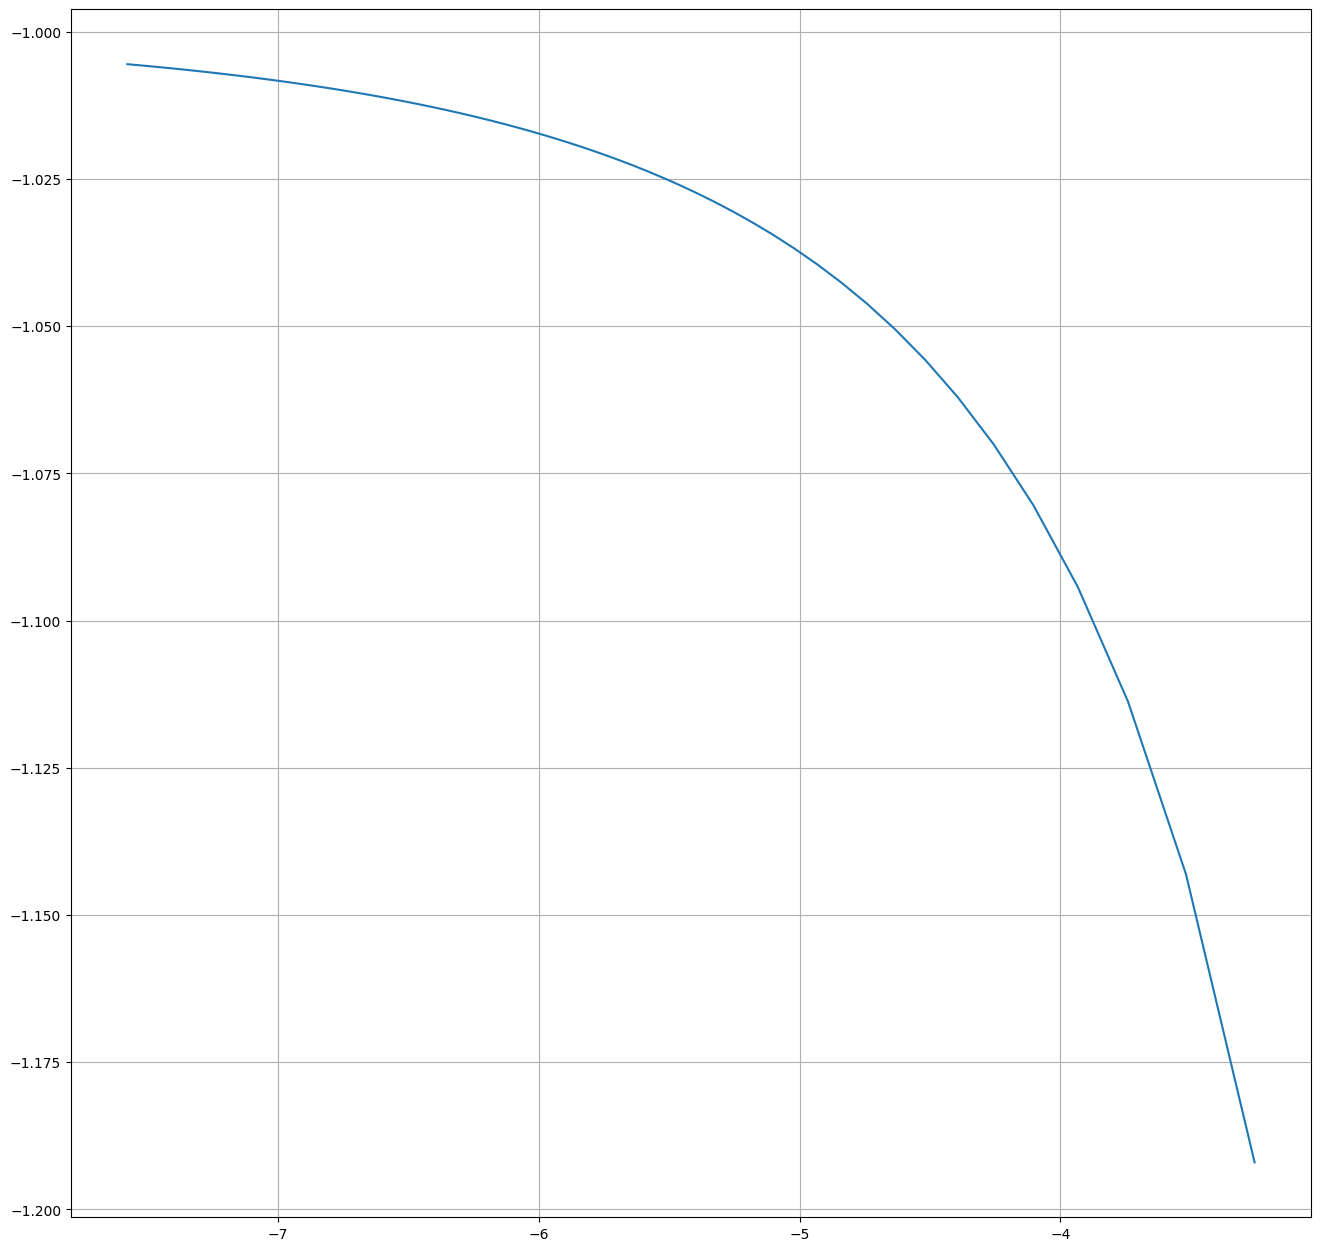

In [40]:
n_end1 = 101

x_graph = np.array ([j for j in range (5, n_end1)])

y_graph2 = np.array ([0.1 for j in range (5, n_end1)])

u_diff = np.cos (a)

for j in range (len (x_graph)):
    p = x_graph[j] - 1
    h = (b - a) / p
    
    diff = (np.sin (a + h) - np.sin (a - h) / (2 * h))

    y_graph2[j] = abs (diff - u_diff)

    p = 2 * p
    h = (b - a) / p

    diff = (np.sin (a + h) - np.sin (a - h) / (2 * h))

    y_graph2[j] = np.log2 (y_graph2[j] / (abs (diff - u_diff)))

plt.figure ()

fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.plot (np.log2 ((b - a) / (x_graph)), y_graph2)

plt.grid ()

plt.savefig(f"./graph3.png", dpi=100)

plt.show()

## Использование sympy для дифференцирования ф-й

Пакет sympy очень удобный инструмент для символьных вычислений. Но не стоит с помощью него реализовывать какие-либо численные методы. Рассмотрим пример его использования для дифференцирования:

In [12]:
#пример взять отсюда https://maths-with-python.readthedocs.io/en/latest/07-sympy.html
#еще про sympy можно посмотреть здесь http://www.asmeurer.com/sympy_doc/dev-py3k/tutorial/tutorial.ru.html
import sympy as sp
import numpy as np

x = sp.Symbol('x')

expression = x**2*sp.sin(sp.log(x))
print('Первая производная', sp.diff(expression, x))
print('Вторая производная', sp.diff(expression, x, 2))
print('Третья производная', sp.diff(expression, x, 3))

expr2 = sp.sin(x)
expr2 = sp.diff(expr2, x, 2)
expr2.subs(x, np.pi/2) #подстваляем значение и вычисляем символьное выражение

Первая производная 2*x*sin(log(x)) + x*cos(log(x))
Вторая производная sin(log(x)) + 3*cos(log(x))
Третья производная (-3*sin(log(x)) + cos(log(x)))/x


-1.00000000000000